Shell Sort Algorithm -  Knuth's Sequence Version
--

In [1]:
from datetime import datetime
current_date_time = datetime.now()
formatted_date_time = current_date_time.strftime("%Y-%m-%d %H:%M:%S")
author = 'Federico Targa'
print('------------------------------------')
print("| Date & Hour:", formatted_date_time,'|')
print('------------------------------------')
print('------------------------------------')
print('     |Author: ', author                 ,'|')
print('------------------------------------')

------------------------------------
| Date & Hour: 2023-08-15 16:42:21 |
------------------------------------
------------------------------------
     |Author:  Federico Targa |
------------------------------------


INTRODUCTION
--
Shell sort is an efficient sorting algorithm that improves upon the insertion sort algorithm by allowing elements to move in larger steps towards their sorted positions. Donald Shell introduced this algorithm in 1959, and it's known for its adaptability to different input sequences. One of the sequences commonly used with Shell sort is Donald Knuth's sequence.
Knuth's sequence is a series of integers that are used to determine the gap between elements that are compared and swapped during the sorting process. The sequence is generated using the formula h(n) = 3*h(n-1) + 1, with an initial value of h(0) = 1. This sequence tends to produce good results for shell sorting.

HOW DOES IT WORKS?
---
Let's see how the Shell sort algorithm works with Knuth's sequence

1) Generate the Gap Sequence (Knuth's sequence):
Start with h = 1 and use the formula h(n) = 3*h(n-1) + 1 to generate a series of gap values. Continue generating gap values until you have a gap value greater than the length of the array you're sorting. These gap values will be used to determine how elements are compared and swapped during the sorting process.

2) Sorting Passes:
Perform sorting passes for each gap value in the sequence, starting from the largest gap and decreasing towards 1. For each gap value, perform an insertion sort-like process on the subarrays created by partitioning the main array into segments of the given gap.

3) Insertion Sort-like Pass:
For each segment of the array determined by the current gap, use insertion sort to sort the elements within that segment. However, unlike regular insertion sort where adjacent elements are compared and swapped, elements that are separated by the current gap distance are compared and swapped.

4) Reduce Gap:
After completing the sorting pass for a particular gap value, reduce the gap according to the Knuth sequence (h(n) = (h(n) - 1) / 3). This step will gradually decrease the gap size until it reaches 1.

5) Final Pass:
The final pass of the algorithm will have a gap of 1, effectively performing a standard insertion sort on the entire array. This final pass takes advantage of the work done by the previous passes to make the remaining sorting process more efficient.

6) Algorithm Completion:
After the final pass with a gap of 1, the array is completely sorted, and the algorithm terminates.

EXAMPLE:
--

Input unsorted array : [8, 4, 1, 6, 9, 2, 7, 5, 3]

Knuth's sequence: 1, 4, 13 (Generated using h(n) = 3*h(n-1) + 1)

1) First pass with gap = 13:

Subarrays: [8, 2], [4, 7], [1, 5], [6, 3], [9]: perform Insertion sort within subarrays

2) Second pass with gap = 4:

Subarrays: [8, 9, 1, 3], [4, 2, 6, 5], [7]: perform Insertion sort within subarrays

3) Third pass with gap = 1: perform Standard insertion sort on the entire array

The main idea behind Shell sort with Knuth's sequence is to initially perform sorting with larger gaps, which helps in quickly moving smaller elements towards their appropriate positions. As the algorithm progresses and the gap decreases, the array becomes increasingly more sorted, making the final insertion sort pass highly efficient. This algorithm strikes a balance between the efficiency of insertion sort and the speed of larger gap increments.

IMPLEMENTATION
--
! Remember that adding comments to your code is an excellent practice for improving code readability and understanding, especially for complex algorithms like sorting !

In [2]:
def shell_sort_knuths(arr):
    n = len(arr)
    gap = 1
    
    # Generate Knuth's sequence for gap values
    while gap < n // 3:
        gap = 3 * gap + 1
    
    # Loop through different gap values in the sequence
    while gap > 0:
        # Perform insertion-sort-like steps for each segment
        for i in range(gap, n):
            temp = arr[i]  # Current element to be inserted in its correct position
            j = i
            
            # Compare and move elements within the segment
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            
            # Place the current element in its correct position
            arr[j] = temp
        
        # Reduce the gap according to Knuth's sequence
        gap = (gap - 1) // 3

TEST 1: small input array
--

In [3]:
import numpy as np
np.random.seed(42) 
arr = np.random.randint(-1000,1000, size = 13)
arr = list(arr)
#**********************************************
print('Unsorted array: ', arr)
shell_sort_knuths(arr)
print()
print('Sorted array: ', arr)

Unsorted array:  [126, 459, -140, 294, 130, 95, 724, 44, 638, -879, -534, 238, -670]

Sorted array:  [-879, -670, -534, -140, 44, 95, 126, 130, 238, 294, 459, 638, 724]


TEST 2: huge imput array
--

In [4]:
import time
start_time = time.time()
np.random.seed(42) 
arr = np.random.randint(-100_000,100_000, size = 800000)
arr = list(arr)
#**********************************************
#print('Unsorted array: ', arr)
shell_sort_knuths(arr)
#print()
#print('Sorted array: ', arr)
end_time = time.time()

print('Execution time: ', round((end_time-start_time), 3), '[s]')

Execution time:  12.669 [s]


TEST 2: huge imput array
--
We can partially solve the slow running time in two ways:
1) changing sosrting algorithm (Merge , Quick, Heap and so on)
2) decorating function with njit

Let's try with second option (don't worry about deprecation warning)

In [5]:
from numba import njit
import time
start_time = time.time()


@njit # using njit as decorator for shell_sort function 
def shell_sort_knuths(arr):
    n = len(arr)
    gap = 1
    
    # Generate Knuth's sequence for gap values
    while gap < n // 3:
        gap = 3 * gap + 1
    
    # Loop through different gap values in the sequence
    while gap > 0:
        # Perform insertion-sort-like steps for each segment
        for i in range(gap, n):
            temp = arr[i]  # Current element to be inserted in its correct position
            j = i
            
            # Compare and move elements within the segment
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            
            # Place the current element in its correct position
            arr[j] = temp
        
        # Reduce the gap according to Knuth's sequence
        gap = (gap - 1) // 3

np.random.seed(42) 
arr = np.random.randint(-100_000,100_000, size = 800_000)
arr = list(arr)
#**********************************************
#print('Unsorted array: ', arr)
shell_sort_knuths(arr)
#print()
#print('Sorted array: ', arr)
end_time = time.time()

print('Execution time: ', round((end_time-start_time), 3), '[s]')

C:\Users\ACER\anaconda3\lib\site-packages\numba\core\ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'arr' of function 'shell_sort_knuths'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\AppData\Local\Temp\ipykernel_2520\159032112.py", line 6:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Execution time:  3.684 [s]


! However, as shown below, in spite of running time reduction, Shell Sort Algorithm is not suitable for large input arrays !
--

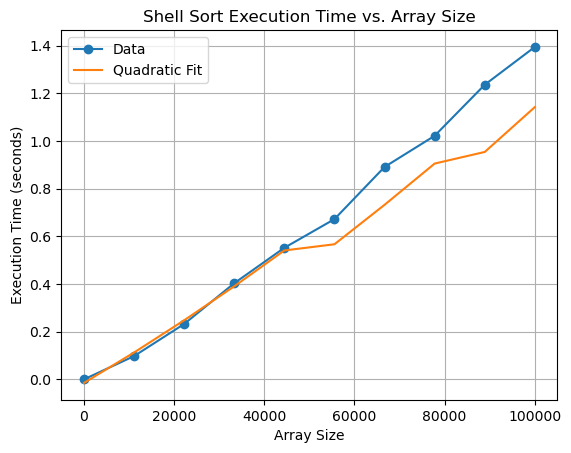

Quadratic model parameters: [ 3.07064332e-11  1.11348189e-05 -1.49391149e-02]


In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def shell_sort(arr):
    n = len(arr)
    gap = 1
    while gap < n // 3:
        gap = 3 * gap + 1
    
    start_time = time.time()
    
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap = (gap - 1) // 3
    
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

def quadratic_model(x, a, b, c):
    return a * x ** 2 + b * x + c

array_sizes = np.linspace(1, 100000, num=10, dtype=int)
execution_times = []

for size in array_sizes:
    test_array = np.random.randint(1, 1000000, size=size)
    
    # Handle possible invalid values during time measurement
    try:
        time_taken = shell_sort(test_array.copy())
        execution_times.append(time_taken)
    except:
        execution_times.append(np.nan)  # Use np.nan for invalid data

# Remove NaN values for curve fitting
valid_indices = ~np.isnan(execution_times)
valid_sizes = array_sizes[valid_indices]
valid_times = np.array(execution_times)[valid_indices]

# Fit the quadratic model to the data
params, _ = curve_fit(quadratic_model, valid_sizes, valid_times)

# Plotting
plt.plot(valid_sizes, valid_times, marker='o', label='Data')
plt.plot(array_sizes, quadratic_model(array_sizes, *params), label='Quadratic Fit')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Shell Sort Execution Time vs. Array Size')
plt.grid(True)
plt.legend()
plt.show()

print("Quadratic model parameters:", params)
